In [1]:
import pandas as pd
pv_df = pd.read_csv('21~22년 태양광 데이터.csv')
wt_df = pd.read_csv('가공날씨데이터.csv')

In [2]:
pv_df.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,season_autumn,season_spring,season_summer,season_winter
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53,0,0,0,1
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53,0,0,0,1
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53,0,0,0,1
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53,0,0,0,1
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53,0,0,0,1


In [3]:
pv_df = pv_df.iloc[:,:-4]
pv_df.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53


In [4]:
wt_df.head()

,datetime,temp,humidity,wind_speed,clouds_all,weather_main
0,2021-01-01 00,-7.02,54,2.83,0,Clear
1,2021-01-01 01,-6.79,55,3.62,0,Clear
2,2021-01-01 02,-3.35,51,4.93,0,Clear
3,2021-01-01 03,-2.77,51,5.75,0,Clear
4,2021-01-01 04,-2.31,50,6.08,0,Clear


In [5]:
wt_df.rename(columns={'Datetime':'datetime'}, inplace=True)
wt_df.head()

,datetime,temp,humidity,wind_speed,clouds_all,weather_main
0,2021-01-01 00,-7.02,54,2.83,0,Clear
1,2021-01-01 01,-6.79,55,3.62,0,Clear
2,2021-01-01 02,-3.35,51,4.93,0,Clear
3,2021-01-01 03,-2.77,51,5.75,0,Clear
4,2021-01-01 04,-2.31,50,6.08,0,Clear


In [6]:
wt_df['datetime'] = wt_df['datetime'].apply(lambda x : x.split(':00:00')[0])

In [7]:
wt_df.head()

,datetime,temp,humidity,wind_speed,clouds_all,weather_main
0,2021-01-01 00,-7.02,54,2.83,0,Clear
1,2021-01-01 01,-6.79,55,3.62,0,Clear
2,2021-01-01 02,-3.35,51,4.93,0,Clear
3,2021-01-01 03,-2.77,51,5.75,0,Clear
4,2021-01-01 04,-2.31,50,6.08,0,Clear


In [8]:
wt_df.to_csv('가공날씨데이터.csv', index=False)

In [9]:
all_data = pv_df.merge(wt_df, on='datetime', how='left')

In [10]:
all_data.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,temp,humidity,wind_speed,clouds_all,weather_main
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53,-2.38,62,5.08,77,Clouds
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53,-2.84,63,4.05,7,Clear
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53,-2.59,66,1.82,0,Clear
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53,-2.67,69,1.64,17,Clouds
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53,-3.53,73,1.91,12,Clouds


In [11]:
wt_df.head(50)

,datetime,temp,humidity,wind_speed,clouds_all,weather_main
0,2021-01-01 00,-7.02,54,2.83,0,Clear
1,2021-01-01 01,-6.79,55,3.62,0,Clear
2,2021-01-01 02,-3.35,51,4.93,0,Clear
3,2021-01-01 03,-2.77,51,5.75,0,Clear
4,2021-01-01 04,-2.31,50,6.08,0,Clear
5,2021-01-01 05,-0.95,49,6.25,5,Clear
6,2021-01-01 06,-0.95,52,6.24,40,Clouds
7,2021-01-01 07,-1.18,54,5.89,56,Clouds
8,2021-01-01 08,-2.38,62,5.08,77,Clouds
9,2021-01-01 09,-2.84,63,4.05,7,Clear


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9151 entries, 0 to 9150
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                9151 non-null   object 
 1   power                   9151 non-null   float64
 2   inclination_irradiance  9151 non-null   float64
 3   horizontal_irradiance   9151 non-null   float64
 4   module_temp             9151 non-null   float64
 5   ambient_temp            9151 non-null   float64
 6   hour                    9151 non-null   int64  
 7   day                     9151 non-null   int64  
 8   month                   9151 non-null   int64  
 9   week                    9151 non-null   int64  
 10  temp                    9151 non-null   float64
 11  humidity                9151 non-null   int64  
 12  wind_speed              9151 non-null   float64
 13  clouds_all              9151 non-null   int64  
 14  weather_main            9151 non-null   

In [13]:
encoded_df = pd.get_dummies(all_data['weather_main'])

In [14]:
all_df = pd.concat([all_data, encoded_df],axis=1)
all_df.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,temp,humidity,wind_speed,clouds_all,weather_main,Clear,Clouds,Rain,Snow
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53,-2.38,62,5.08,77,Clouds,0,1,0,0
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53,-2.84,63,4.05,7,Clear,1,0,0,0
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53,-2.59,66,1.82,0,Clear,1,0,0,0
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53,-2.67,69,1.64,17,Clouds,0,1,0,0
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53,-3.53,73,1.91,12,Clouds,0,1,0,0


In [15]:
all_df.drop('weather_main',axis=1,inplace=True)
all_df.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,temp,humidity,wind_speed,clouds_all,Clear,Clouds,Rain,Snow
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53,-2.38,62,5.08,77,0,1,0,0
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53,-2.84,63,4.05,7,1,0,0,0
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53,-2.59,66,1.82,0,1,0,0,0
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53,-2.67,69,1.64,17,0,1,0,0
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53,-3.53,73,1.91,12,0,1,0,0


In [16]:
all_df.shape

(9151, 18)

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9151 entries, 0 to 9150
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                9151 non-null   object 
 1   power                   9151 non-null   float64
 2   inclination_irradiance  9151 non-null   float64
 3   horizontal_irradiance   9151 non-null   float64
 4   module_temp             9151 non-null   float64
 5   ambient_temp            9151 non-null   float64
 6   hour                    9151 non-null   int64  
 7   day                     9151 non-null   int64  
 8   month                   9151 non-null   int64  
 9   week                    9151 non-null   int64  
 10  temp                    9151 non-null   float64
 11  humidity                9151 non-null   int64  
 12  wind_speed              9151 non-null   float64
 13  clouds_all              9151 non-null   int64  
 14  Clear                   9151 non-null   

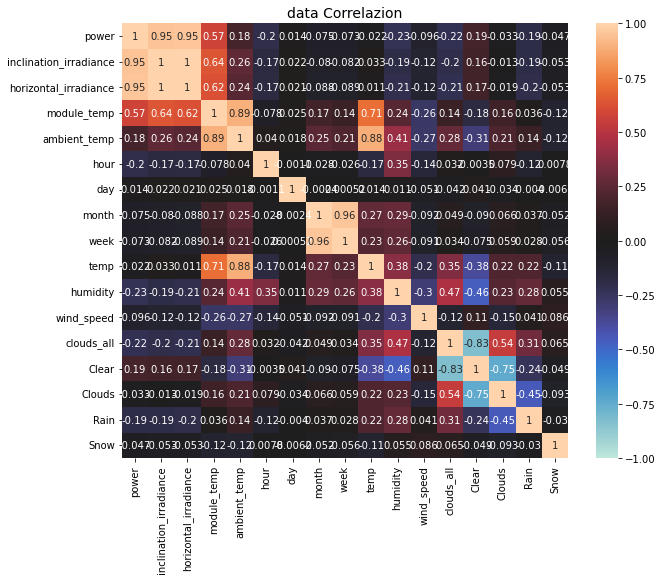

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
data = all_df.drop(['datetime'],axis=1)
fig = plt.subplots(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title('data Correlazion', fontsize=14);

### 타겟데이터 이상치 제거
* 일사량데이터가 0인데도 불구하고 발전량이 1 이상인 데이터를 일사량이 0일때의 평균인 0.45로 값 변경
* 일사량이 50보다 작은데 평균보다 과도하게 많이 발전되는 데이터를 평균 값으로 변경
* 특이한 이상치 값들 평균값으로 변경

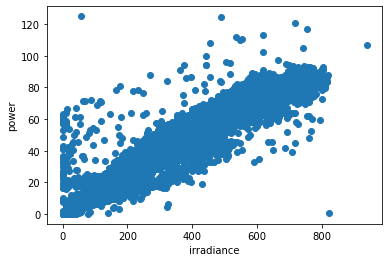

In [20]:
plt.scatter(all_df['inclination_irradiance'], all_df['power'])
plt.xlabel('irradiance')
plt.ylabel('power')
plt.show()

In [22]:
cond1 = all_df['power']>1
cond2 = all_df['inclination_irradiance']==0
cond3 = all_df['horizontal_irradiance']==0
all_df[cond1&cond2&cond3][['power','inclination_irradiance','horizontal_irradiance']]

,power,inclination_irradiance,horizontal_irradiance
74,30.00,0.0,0.0
416,24.41,0.0,0.0
782,32.00,0.0,0.0
881,62.41,0.0,0.0
1139,19.00,0.0,0.0
1402,16.20,0.0,0.0
1918,61.30,0.0,0.0
2124,59.80,0.0,0.0
2270,8.00,0.0,0.0
2385,1.50,0.0,0.0


In [23]:
all_df.loc[cond1 & cond2 & cond3, 'power'] = 0.45

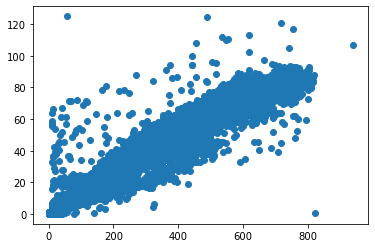

In [24]:
plt.scatter(all_df['inclination_irradiance'], all_df['power'])

In [25]:
cond1 = all_df['power']>20
cond2 = all_df['inclination_irradiance']<50
cond3 = all_df['horizontal_irradiance']<50
all_df[cond1&cond2&cond3][['power','inclination_irradiance','horizontal_irradiance']]

,power,inclination_irradiance,horizontal_irradiance
644,57.70,10.05,10.91
722,57.20,11.16,12.60
860,28.00,40.28,43.69
1073,23.09,34.60,39.28
1297,21.00,25.18,28.94
1390,28.11,44.97,48.09
1514,33.70,33.10,37.61
1963,27.20,19.16,22.34
1991,66.59,13.78,16.75
2502,36.80,14.04,16.31


In [26]:
all_df.loc[cond1 & cond2 & cond3, 'power'] = 22

In [27]:
all_df[cond1&cond2&cond3][['power','inclination_irradiance','horizontal_irradiance']]

,power,inclination_irradiance,horizontal_irradiance
644,22.0,10.05,10.91
722,22.0,11.16,12.60
860,22.0,40.28,43.69
1073,22.0,34.60,39.28
1297,22.0,25.18,28.94
1390,22.0,44.97,48.09
1514,22.0,33.10,37.61
1963,22.0,19.16,22.34
1991,22.0,13.78,16.75
2502,22.0,14.04,16.31


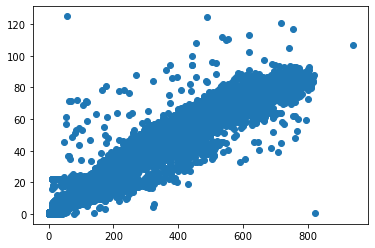

In [28]:
plt.scatter(all_df['inclination_irradiance'], all_df['power'])


In [29]:
cond1 = all_df['power']>120
cond2 = all_df['inclination_irradiance']<100
cond3 = all_df['horizontal_irradiance']<100
all_df[cond1&cond2&cond3][['power','inclination_irradiance','horizontal_irradiance']]

,power,inclination_irradiance,horizontal_irradiance
1843,125.0,58.3,63.87


In [30]:
all_df.loc[cond1 & cond2 & cond3, 'power'] = 22

In [31]:
cond1 = all_df['power']<10
cond2 = all_df['inclination_irradiance']>800
cond3 = all_df['horizontal_irradiance']>800
all_df[cond1&cond2&cond3][['power','inclination_irradiance','horizontal_irradiance']]

,power,inclination_irradiance,horizontal_irradiance
2803,0.7,823.33,846.56


In [32]:
all_df.loc[cond1 & cond2 & cond3, 'power'] = 86.09

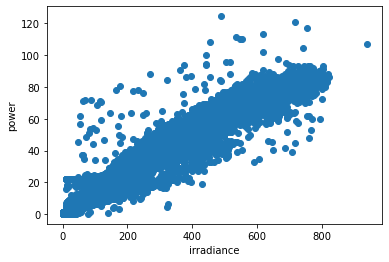

In [33]:
plt.scatter(all_df['inclination_irradiance'], all_df['power'])
plt.xlabel('irradiance')
plt.ylabel('power')
plt.show()

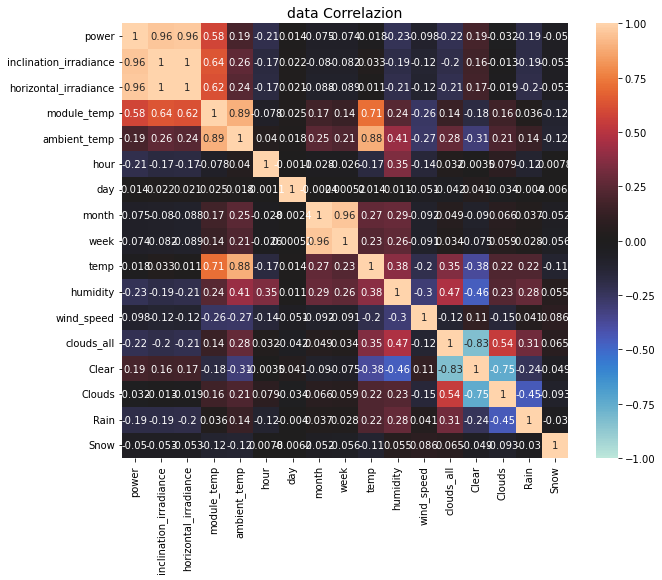

In [34]:
data = all_df.drop(['datetime'],axis=1)
fig = plt.subplots(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title('data Correlazion', fontsize=14);

### 치우쳐진 타겟값을 로그변환으로 정규분포형태로 만들기

<AxesSubplot:xlabel='power', ylabel='Count'>

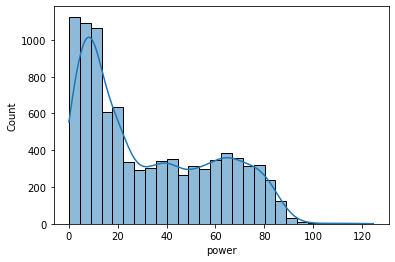

In [35]:
sns.histplot(all_df['power'], kde=True)

<AxesSubplot:xlabel='power', ylabel='Count'>

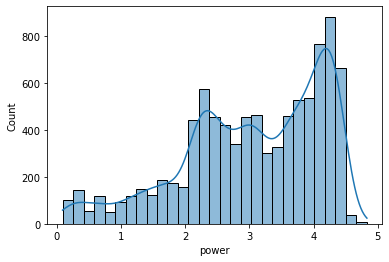

In [36]:
import numpy as np
all_df['power'] = np.log1p(all_df['power'])
sns.histplot(all_df['power'], kde=True)

In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9151 entries, 0 to 9150
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                9151 non-null   object 
 1   power                   9151 non-null   float64
 2   inclination_irradiance  9151 non-null   float64
 3   horizontal_irradiance   9151 non-null   float64
 4   module_temp             9151 non-null   float64
 5   ambient_temp            9151 non-null   float64
 6   hour                    9151 non-null   int64  
 7   day                     9151 non-null   int64  
 8   month                   9151 non-null   int64  
 9   week                    9151 non-null   int64  
 10  temp                    9151 non-null   float64
 11  humidity                9151 non-null   int64  
 12  wind_speed              9151 non-null   float64
 13  clouds_all              9151 non-null   int64  
 14  Clear                   9151 non-null   

In [38]:
from xgboost import XGBRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_squared_error, r2_score
y_target = all_df['power']
X_features=all_df.drop(['datetime','power'], axis=1)
X_train,X_test,y_train,y_test = temporal_train_test_split(X_features, y_target, test_size=0.2)

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)
pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2score = r2_score(y_test, pred)
print('mse : {0:.4f}, rmse : {1:.4f}, r2score : {2:.4f}'.format(mse, rmse, r2score))    

C:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mse : 0.0908, rmse : 0.3013, r2score : 0.9225


### hyperopt로 하이퍼파라미터 설정

In [87]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

def objective_func(search_space):
    xgb_reg = XGBRegressor(n_estimators=1000, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            subsample=search_space['subsample'],
                            reg_alpha=search_space['reg_alpha'],
                            eval_metric='rmse')
    scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    return {'loss':-1 * np.mean(scores), 'status': STATUS_OK}

In [88]:
xgb_search_space = {'max_depth':hp.quniform('max_depth',4,20,1),
                   'min_child_weight':hp.quniform('min_child_weight', 1,5,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree':hp.uniform('colsample_bytree', 0.8,1),
                   'subsample':hp.uniform('subsample',0.8,1),
                   'reg_alpha':hp.uniform('reg_alpha',0,1)}
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val)
print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  2%|▉                                             | 1/50 [01:22<1:07:08, 82.22s/trial, best loss: 0.07156898107641178]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  4%|█▊                                            | 2/50 [03:08<1:17:18, 96.63s/trial, best loss: 0.06877989458948319]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  6%|██▋                                          | 3/50 [05:00<1:20:58, 103.38s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  8%|███▋                                          | 4/50 [06:27<1:14:26, 97.09s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 10%|████▌                                         | 5/50 [08:00<1:11:32, 95.40s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 12%|█████▌                                        | 6/50 [09:05<1:02:33, 85.31s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 14%|██████▍                                       | 7/50 [10:27<1:00:15, 84.08s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 16%|███████▋                                        | 8/50 [11:30<54:16, 77.54s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 18%|████████▋                                       | 9/50 [12:44<52:10, 76.35s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 20%|█████████▍                                     | 10/50 [14:01<51:04, 76.60s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 22%|██████████▎                                    | 11/50 [15:25<51:13, 78.80s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 24%|███████████▎                                   | 12/50 [17:19<56:35, 89.35s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 26%|████████████▏                                  | 13/50 [18:12<48:19, 78.36s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 28%|█████████████▏                                 | 14/50 [19:31<47:07, 78.55s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 30%|██████████████                                 | 15/50 [20:34<43:08, 73.94s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 32%|███████████████                                | 16/50 [21:42<40:50, 72.07s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 34%|███████████████▉                               | 17/50 [22:19<33:55, 61.69s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 36%|████████████████▉                              | 18/50 [23:05<30:22, 56.97s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 38%|█████████████████▊                             | 19/50 [24:11<30:50, 59.70s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 40%|██████████████████▊                            | 20/50 [25:43<34:41, 69.38s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 42%|███████████████████▋                           | 21/50 [27:05<35:21, 73.15s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 44%|████████████████████▋                          | 22/50 [28:33<36:15, 77.69s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 46%|█████████████████████▌                         | 23/50 [29:06<28:49, 64.05s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 48%|██████████████████████▌                        | 24/50 [30:37<31:18, 72.24s/trial, best loss: 0.06799689967397604]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 50%|███████████████████████▌                       | 25/50 [32:35<35:52, 86.10s/trial, best loss: 0.06754256170667797]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 52%|████████████████████████▍                      | 26/50 [34:40<38:59, 97.49s/trial, best loss: 0.06754256170667797]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 54%|████████████████████████▊                     | 27/50 [36:46<40:45, 106.31s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 56%|█████████████████████████▊                    | 28/50 [38:41<39:55, 108.90s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 58%|██████████████████████████▋                   | 29/50 [40:44<39:31, 112.93s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 60%|███████████████████████████▌                  | 30/50 [43:06<40:34, 121.74s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 62%|████████████████████████████▌                 | 31/50 [44:59<37:42, 119.06s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 64%|█████████████████████████████▍                | 32/50 [46:50<35:02, 116.82s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 66%|██████████████████████████████▎               | 33/50 [48:31<31:44, 112.03s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 68%|███████████████████████████████▎              | 34/50 [50:23<29:49, 111.82s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 70%|████████████████████████████████▏             | 35/50 [51:48<25:58, 103.89s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 72%|█████████████████████████████████▊             | 36/50 [52:22<19:21, 82.99s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 74%|██████████████████████████████████▊            | 37/50 [53:59<18:53, 87.22s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 76%|███████████████████████████████████▋           | 38/50 [55:46<18:36, 93.07s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 78%|████████████████████████████████████▋          | 39/50 [57:04<16:15, 88.64s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 80%|█████████████████████████████████████▌         | 40/50 [58:07<13:29, 80.92s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 82%|██████████████████████████████████████▌        | 41/50 [59:30<12:12, 81.37s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 84%|█████████████████████████████████████▊       | 42/50 [1:00:56<11:02, 82.85s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 86%|██████████████████████████████████████▋      | 43/50 [1:02:40<10:23, 89.13s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 88%|███████████████████████████████████████▌     | 44/50 [1:03:36<07:56, 79.40s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 90%|████████████████████████████████████████▌    | 45/50 [1:04:25<05:51, 70.28s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 92%|█████████████████████████████████████████▍   | 46/50 [1:05:55<05:04, 76.10s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 94%|██████████████████████████████████████████▎  | 47/50 [1:07:02<03:40, 73.38s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 96%|███████████████████████████████████████████▏ | 48/50 [1:09:09<02:58, 89.32s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 98%|████████████████████████████████████████████ | 49/50 [1:10:20<01:24, 84.01s/trial, best loss: 0.06733666157464999]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

100%|█████████████████████████████████████████████| 50/50 [1:11:42<00:00, 86.05s/trial, best loss: 0.06733666157464999]
best: {'colsample_bytree': 0.8674142595706442, 'learning_rate': 0.01203925959986291, 'max_depth': 20.0, 'min_child_weight': 5.0, 'reg_alpha': 0.59472295561719, 'subsample': 0.9678123031301163}


In [89]:
xgb_reg = XGBRegressor(n_estimators=10000, learning_rate=round(best['learning_rate'], 5), 
                            max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5), subsample=round(best['subsample'],5),
                       reg_alpha=round(best['reg_alpha'],5)
                           )
X_tr,X_val,y_tr,y_val = temporal_train_test_split(X_train,y_train,test_size=0.2)
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_reg.fit(X_tr,y_tr, early_stopping_rounds=1000, eval_metric='rmse', eval_set=evals, verbose=True)
pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, pred)
print('mse : {0:.4f}, rmse : {1:.4f}, r2score : {2:.4f}'.format(mse, rmse, r2score))    

[0]	validation_0-rmse:2.76614	validation_1-rmse:2.77494
[1]	validation_0-rmse:2.73325	validation_1-rmse:2.74212
[2]	validation_0-rmse:2.70081	validation_1-rmse:2.71003
[3]	validation_0-rmse:2.66868	validation_1-rmse:2.67840
[4]	validation_0-rmse:2.63697	validation_1-rmse:2.64709
[5]	validation_0-rmse:2.60564	validation_1-rmse:2.61620
[6]	validation_0-rmse:2.57469	validation_1-rmse:2.58532
[7]	validation_0-rmse:2.54411	validation_1-rmse:2.55512
[8]	validation_0-rmse:2.51390	validation_1-rmse:2.52536
[9]	validation_0-rmse:2.48409	validation_1-rmse:2.49594
[10]	validation_0-rmse:2.45461	validation_1-rmse:2.46693
[11]	validation_0-rmse:2.42548	validation_1-rmse:2.43825
[12]	validation_0-rmse:2.39676	validation_1-rmse:2.40995
[13]	validation_0-rmse:2.36833	validation_1-rmse:2.38205
[14]	validation_0-rmse:2.34025	validation_1-rmse:2.35438
[15]	validation_0-rmse:2.31256	validation_1-rmse:2.32674
[16]	validation_0-rmse:2.28516	validation_1-rmse:2.29973
[17]	validation_0-rmse:2.25808	validation

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-rmse:2.12796	validation_1-rmse:2.14405
[23]	validation_0-rmse:2.10278	validation_1-rmse:2.11903
[24]	validation_0-rmse:2.07792	validation_1-rmse:2.09441
[25]	validation_0-rmse:2.05336	validation_1-rmse:2.07025
[26]	validation_0-rmse:2.02909	validation_1-rmse:2.04605
[27]	validation_0-rmse:2.00511	validation_1-rmse:2.02253
[28]	validation_0-rmse:1.98142	validation_1-rmse:1.99893
[29]	validation_0-rmse:1.95807	validation_1-rmse:1.97594
[30]	validation_0-rmse:1.93495	validation_1-rmse:1.95308
[31]	validation_0-rmse:1.91215	validation_1-rmse:1.93061
[32]	validation_0-rmse:1.88959	validation_1-rmse:1.90830
[33]	validation_0-rmse:1.86732	validation_1-rmse:1.88630
[34]	validation_0-rmse:1.84531	validation_1-rmse:1.86468
[35]	validation_0-rmse:1.82357	validation_1-rmse:1.84321
[36]	validation_0-rmse:1.80210	validation_1-rmse:1.82178
[37]	validation_0-rmse:1.78088	validation_1-rmse:1.80078
[38]	validation_0-rmse:1.75993	validation_1-rmse:1.78005
[39]	validation_0-rmse:1.73923	

[305]	validation_0-rmse:0.17233	validation_1-rmse:0.24758
[306]	validation_0-rmse:0.17169	validation_1-rmse:0.24717
[307]	validation_0-rmse:0.17107	validation_1-rmse:0.24682
[308]	validation_0-rmse:0.17044	validation_1-rmse:0.24642
[309]	validation_0-rmse:0.16981	validation_1-rmse:0.24602
[310]	validation_0-rmse:0.16924	validation_1-rmse:0.24563
[311]	validation_0-rmse:0.16856	validation_1-rmse:0.24527
[312]	validation_0-rmse:0.16797	validation_1-rmse:0.24491
[313]	validation_0-rmse:0.16739	validation_1-rmse:0.24451
[314]	validation_0-rmse:0.16676	validation_1-rmse:0.24420
[315]	validation_0-rmse:0.16620	validation_1-rmse:0.24385
[316]	validation_0-rmse:0.16562	validation_1-rmse:0.24355
[317]	validation_0-rmse:0.16505	validation_1-rmse:0.24327
[318]	validation_0-rmse:0.16456	validation_1-rmse:0.24291
[319]	validation_0-rmse:0.16400	validation_1-rmse:0.24265
[320]	validation_0-rmse:0.16350	validation_1-rmse:0.24228
[321]	validation_0-rmse:0.16295	validation_1-rmse:0.24196
[322]	validati

[447]	validation_0-rmse:0.12069	validation_1-rmse:0.22410
[448]	validation_0-rmse:0.12043	validation_1-rmse:0.22399
[449]	validation_0-rmse:0.12030	validation_1-rmse:0.22392
[450]	validation_0-rmse:0.12011	validation_1-rmse:0.22383
[451]	validation_0-rmse:0.11985	validation_1-rmse:0.22377
[452]	validation_0-rmse:0.11968	validation_1-rmse:0.22372
[453]	validation_0-rmse:0.11946	validation_1-rmse:0.22365
[454]	validation_0-rmse:0.11934	validation_1-rmse:0.22363
[455]	validation_0-rmse:0.11911	validation_1-rmse:0.22355
[456]	validation_0-rmse:0.11885	validation_1-rmse:0.22352
[457]	validation_0-rmse:0.11865	validation_1-rmse:0.22349
[458]	validation_0-rmse:0.11853	validation_1-rmse:0.22343
[459]	validation_0-rmse:0.11835	validation_1-rmse:0.22337
[460]	validation_0-rmse:0.11809	validation_1-rmse:0.22341
[461]	validation_0-rmse:0.11782	validation_1-rmse:0.22340
[462]	validation_0-rmse:0.11766	validation_1-rmse:0.22343
[463]	validation_0-rmse:0.11746	validation_1-rmse:0.22341
[464]	validati

[729]	validation_0-rmse:0.07786	validation_1-rmse:0.22094
[730]	validation_0-rmse:0.07778	validation_1-rmse:0.22093
[731]	validation_0-rmse:0.07766	validation_1-rmse:0.22093
[732]	validation_0-rmse:0.07755	validation_1-rmse:0.22095
[733]	validation_0-rmse:0.07744	validation_1-rmse:0.22096
[734]	validation_0-rmse:0.07733	validation_1-rmse:0.22096
[735]	validation_0-rmse:0.07723	validation_1-rmse:0.22098
[736]	validation_0-rmse:0.07713	validation_1-rmse:0.22097
[737]	validation_0-rmse:0.07702	validation_1-rmse:0.22100
[738]	validation_0-rmse:0.07691	validation_1-rmse:0.22100
[739]	validation_0-rmse:0.07681	validation_1-rmse:0.22100
[740]	validation_0-rmse:0.07671	validation_1-rmse:0.22101
[741]	validation_0-rmse:0.07662	validation_1-rmse:0.22101
[742]	validation_0-rmse:0.07652	validation_1-rmse:0.22104
[743]	validation_0-rmse:0.07644	validation_1-rmse:0.22102
[744]	validation_0-rmse:0.07634	validation_1-rmse:0.22103
[745]	validation_0-rmse:0.07624	validation_1-rmse:0.22104
[746]	validati

[1011]	validation_0-rmse:0.05836	validation_1-rmse:0.22167
[1012]	validation_0-rmse:0.05832	validation_1-rmse:0.22167
[1013]	validation_0-rmse:0.05827	validation_1-rmse:0.22168
[1014]	validation_0-rmse:0.05823	validation_1-rmse:0.22167
[1015]	validation_0-rmse:0.05819	validation_1-rmse:0.22167
[1016]	validation_0-rmse:0.05815	validation_1-rmse:0.22168
[1017]	validation_0-rmse:0.05811	validation_1-rmse:0.22167
[1018]	validation_0-rmse:0.05806	validation_1-rmse:0.22167
[1019]	validation_0-rmse:0.05802	validation_1-rmse:0.22166
[1020]	validation_0-rmse:0.05798	validation_1-rmse:0.22166
[1021]	validation_0-rmse:0.05793	validation_1-rmse:0.22166
[1022]	validation_0-rmse:0.05788	validation_1-rmse:0.22166
[1023]	validation_0-rmse:0.05785	validation_1-rmse:0.22166
[1024]	validation_0-rmse:0.05781	validation_1-rmse:0.22166
[1025]	validation_0-rmse:0.05776	validation_1-rmse:0.22165
[1026]	validation_0-rmse:0.05772	validation_1-rmse:0.22166
[1027]	validation_0-rmse:0.05767	validation_1-rmse:0.221

[1287]	validation_0-rmse:0.04931	validation_1-rmse:0.22237
[1288]	validation_0-rmse:0.04928	validation_1-rmse:0.22237
[1289]	validation_0-rmse:0.04926	validation_1-rmse:0.22236
[1290]	validation_0-rmse:0.04924	validation_1-rmse:0.22237
[1291]	validation_0-rmse:0.04921	validation_1-rmse:0.22237
[1292]	validation_0-rmse:0.04919	validation_1-rmse:0.22238
[1293]	validation_0-rmse:0.04916	validation_1-rmse:0.22238
[1294]	validation_0-rmse:0.04914	validation_1-rmse:0.22238
[1295]	validation_0-rmse:0.04911	validation_1-rmse:0.22237
[1296]	validation_0-rmse:0.04909	validation_1-rmse:0.22237
[1297]	validation_0-rmse:0.04906	validation_1-rmse:0.22238
[1298]	validation_0-rmse:0.04903	validation_1-rmse:0.22239
[1299]	validation_0-rmse:0.04901	validation_1-rmse:0.22239
[1300]	validation_0-rmse:0.04898	validation_1-rmse:0.22239
[1301]	validation_0-rmse:0.04895	validation_1-rmse:0.22240
[1302]	validation_0-rmse:0.04893	validation_1-rmse:0.22240
[1303]	validation_0-rmse:0.04891	validation_1-rmse:0.222

[1426]	validation_0-rmse:0.04630	validation_1-rmse:0.22266
[1427]	validation_0-rmse:0.04627	validation_1-rmse:0.22266
[1428]	validation_0-rmse:0.04625	validation_1-rmse:0.22266
[1429]	validation_0-rmse:0.04623	validation_1-rmse:0.22266
[1430]	validation_0-rmse:0.04622	validation_1-rmse:0.22267
[1431]	validation_0-rmse:0.04620	validation_1-rmse:0.22267
[1432]	validation_0-rmse:0.04618	validation_1-rmse:0.22266
[1433]	validation_0-rmse:0.04616	validation_1-rmse:0.22266
[1434]	validation_0-rmse:0.04614	validation_1-rmse:0.22267
[1435]	validation_0-rmse:0.04612	validation_1-rmse:0.22267
[1436]	validation_0-rmse:0.04611	validation_1-rmse:0.22267
[1437]	validation_0-rmse:0.04609	validation_1-rmse:0.22267
[1438]	validation_0-rmse:0.04607	validation_1-rmse:0.22268
[1439]	validation_0-rmse:0.04605	validation_1-rmse:0.22268
[1440]	validation_0-rmse:0.04603	validation_1-rmse:0.22269
[1441]	validation_0-rmse:0.04602	validation_1-rmse:0.22269
[1442]	validation_0-rmse:0.04600	validation_1-rmse:0.222

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='power'>)

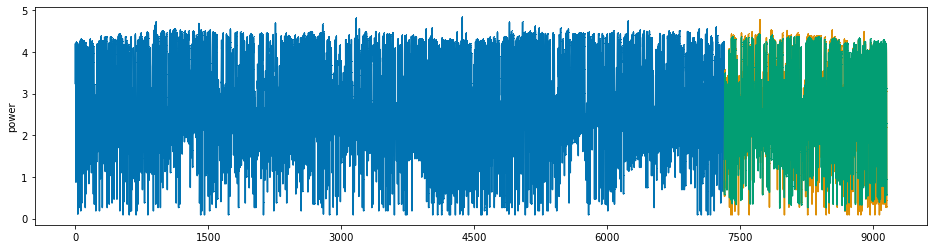

In [90]:
from sktime.utils.plotting import plot_series
pred = pd.Series(pred)
pred.index = np.arange(y_test.index[0], y_test.index[-1]+1)
plot_series(y_train, y_test, pd.Series(pred), markers=[',' , ',', ','])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='power'>)

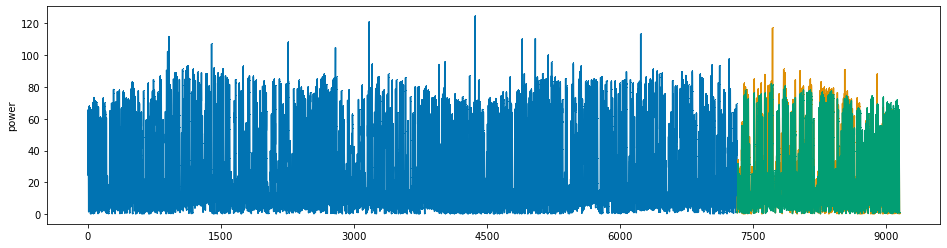

In [91]:
from sktime.utils.plotting import plot_series
y_train_org = np.expm1(y_train)
y_test_org = np.expm1(y_test)
pred_org = np.expm1(pred)
pred_org = pd.Series(pred_org)
pred_org.index = np.arange(y_test_org.index[0], y_test_org.index[-1]+1)
plot_series(y_train_org, y_test_org, pd.Series(pred_org), markers=[',' , ',', ','])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

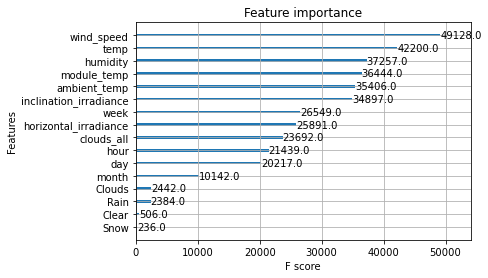

In [93]:
from xgboost import plot_importance
plot_importance(xgb_reg)

<AxesSubplot:>

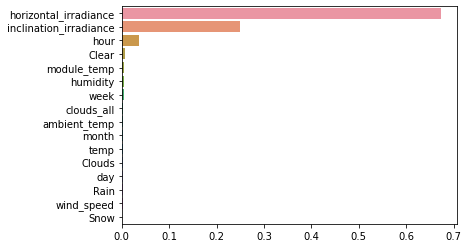

In [97]:
ftr_importances = pd.Series(xgb_reg.feature_importances_, index=X_features.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)
sns.barplot(x=ftr_importances, y=ftr_importances.index)

In [98]:
all_df['wind_speed'].describe()

count    9151.000000
mean        2.657863
std         1.547168
min         0.040000
25%         1.560000
50%         2.250000
75%         3.450000
max         9.810000
Name: wind_speed, dtype: float64

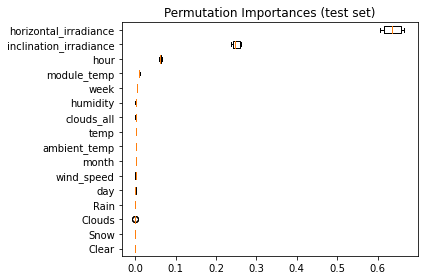

In [100]:
from sklearn.inspection import permutation_importance
result = permutation_importance(xgb_reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'barplot'

C:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
